# Planejamento da solução (IOT)

# Input - Entrada 

## O problema de negócio

 1. Criar um plano de estratégia para adquirir imóveis em ótimas localizações com preços baixos e atrativos para revender à preços mais altos; lucrando mais, maximizando a sua receita..

# Output - Saída

Modelo de Análise para escolha de imóveis com caraterísticas que viabilizem melhor resultado na aquisição re revenda.

1.0. Construção da análise estatística; construção de gráficos para melhor interpretaçaõ  e visualição.

2.0. Painel de análise

Input: https://www.kaggle.com/harlfoxem/housesalesprediction;

Output: Construção da análise em python;


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models

*- Compreensão do negócio e variáveis envolvidas (mapa mental).


# Imports

In [2]:
# data manipulation
import pandas as pd
import numpy  as np 

import inflection
import math
import datetime

# EDA
import seaborn           as sns
import matplotlib.pyplot as plt

# Algorithms
import xgboost as xgb
import random
import warnings
warnings.filterwarnings ('ignore')

from scipy                import stats  as ss 
from IPython.core.display import HTML
from IPython.display      import Image


## Helper Functions

In [30]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [3]:
pwd

'/home/ehgeraldo/repos/Houses_Sales_Prediction/notebook'

In [4]:
ls -l

total 7592
-rw-rw-r-- 1 ehgeraldo ehgeraldo    2806 feb  6 10:07 c0.0-ehgeraldo-planning.ipynb
-rwxrwxr-x 1 ehgeraldo ehgeraldo 7768015 feb  6 09:58 jupyter_notebook.ipynb*


In [5]:
# Load data

df_raw = pd.read_csv('/home/ehgeraldo/repos/Houses_Sales_Prediction/data/kc_house_data.csv')

# Data Description

In [16]:
df1 = df_raw.copy()

In [17]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
cols_old = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [19]:
snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

#rename
df1.colums = cols_new

### Data dimensions

In [20]:
print( 'Number of rows:    {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows:    21613
Number of columns: 21


### Data types

In [21]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [23]:
df1['date'].sample(2)

9831    20140826T000000
789     20140516T000000
Name: date, dtype: object

In [47]:
# change format date (object -> datetime)
df1['date'] = pd.to_datetime(df1['date'])

### Check NAs

In [13]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Descriptive Statiscal:

In [24]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64'])

In [25]:
num_attributes.sample(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4321,8731990090,560000.0,4,2.75,2930,22000,1.0,0,3,4,9,1580,1350,1978,0,98023,47.3227,-122.384,2930,9758
6930,1824079073,985000.0,5,4.25,4650,108464,2.0,0,0,3,10,3260,1390,1999,0,98024,47.5669,-121.956,2810,155509
10582,711000070,730000.0,3,1.75,2040,11294,1.0,0,0,4,7,1340,700,1952,0,98004,47.5923,-122.197,2120,9587


In [26]:
cat_attributes.sample(3)

,date
14602,20141124T000000
11973,20141113T000000
11871,20150112T000000


##  Numerical Atributes:

In [27]:
# Central Tendency - mean, mediana:

ct1 = pd.DataFrame( num_attributes.apply(np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median ) ).T


# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#Concatenate#
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [28]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580302e+09,3.904930e+09,2.876499e+09,0.243329,-1.260542
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.400881e+05,4.500000e+05,3.671187e+05,4.024069,34.585540
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.370842e+00,3.000000e+00,9.300403e-01,1.974300,49.063653
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,2.114757e+00,2.250000e+00,7.701453e-01,0.511108,1.279902
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.079900e+03,1.910000e+03,9.184196e+02,1.471555,5.243093
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.510697e+04,7.618000e+03,4.141955e+04,13.060019,285.077820
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.494309e+00,1.500000e+00,5.399764e-01,0.616177,-0.484723
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02,11.385108,127.632494
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01,3.395750,10.893022
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01,1.032805,0.525764


<AxesSubplot:xlabel='price', ylabel='Density'>

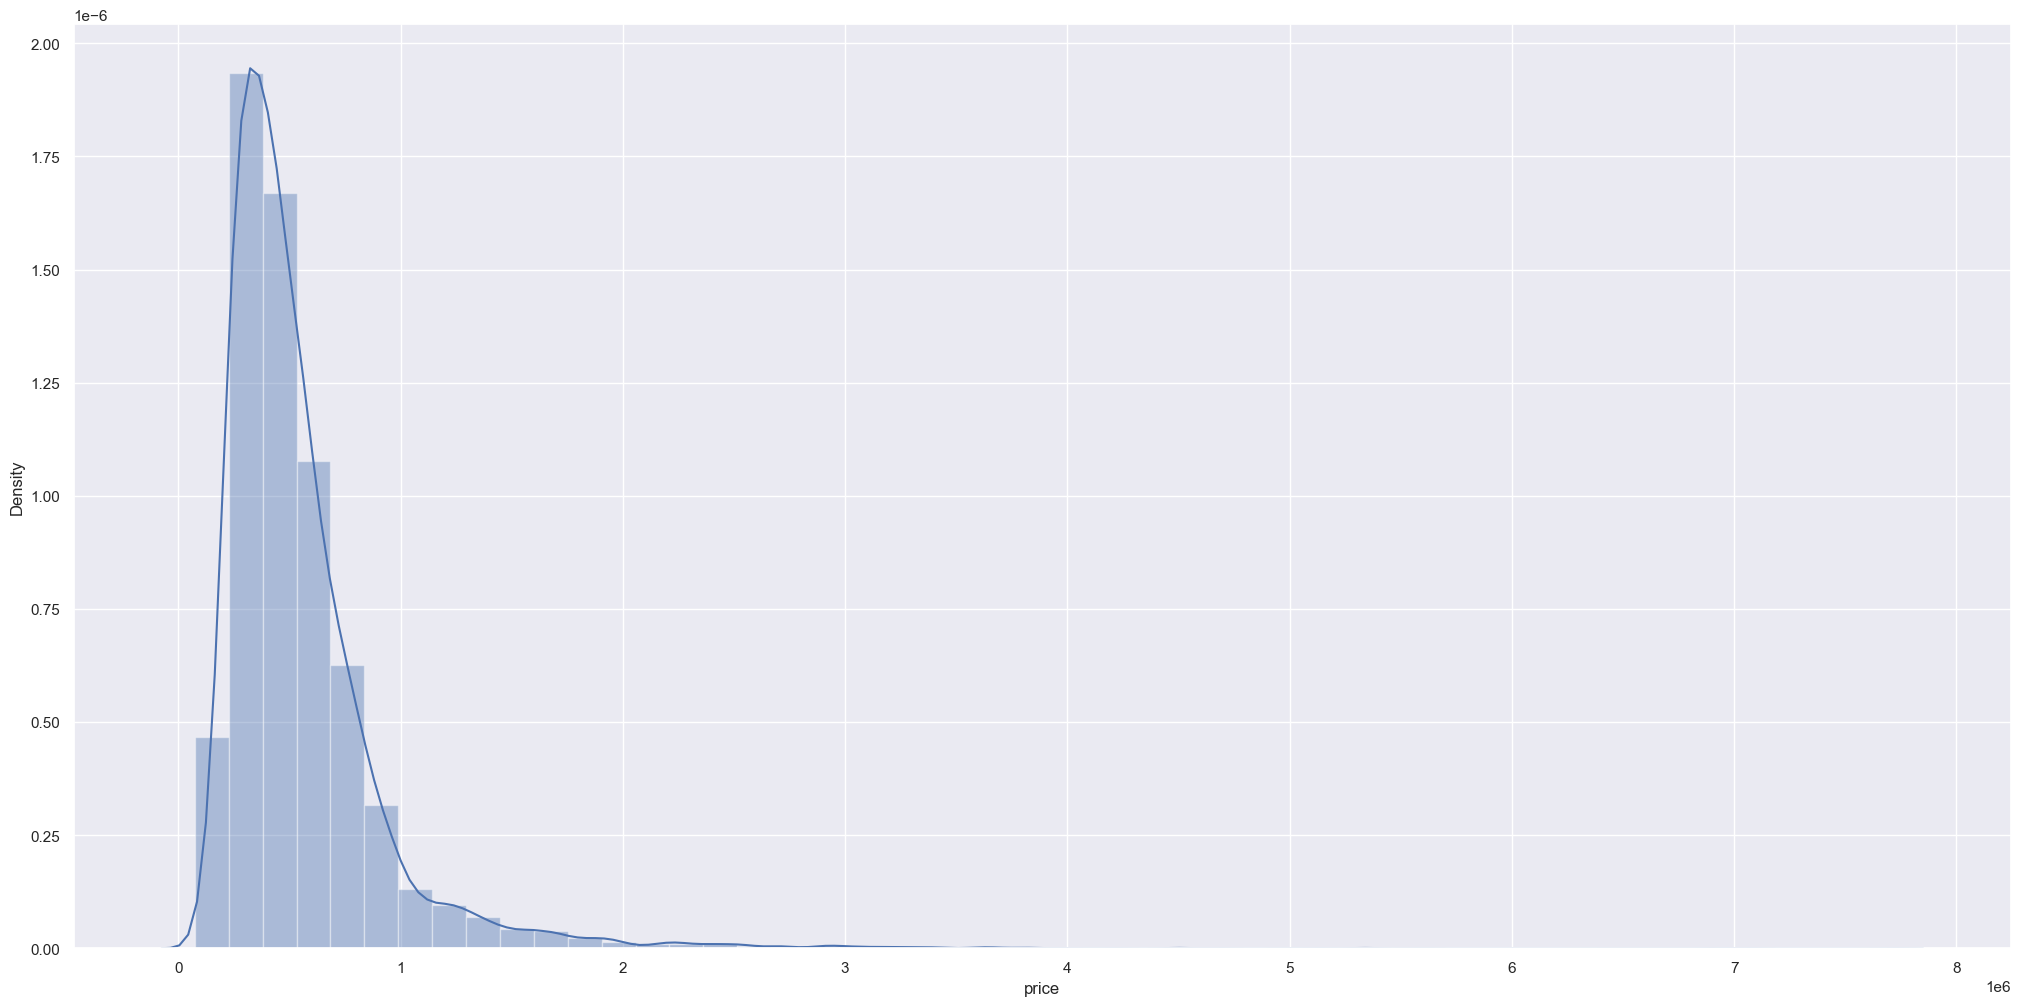

In [31]:
# Price attribute dispersion

# Age attribute dispersion

sns.distplot(df1['price'])

## Categorical Attibutes:

In [48]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

date    372
dtype: int64

In [49]:
df1['date'].min()

Timestamp('2014-05-02 00:00:00')

In [50]:
df1['date'].max()

Timestamp('2015-05-27 00:00:00')

In [54]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object